# This code is to show how to use fooof using BMTK sim data. The data for this example was run for a simulation time of 15 seconds with a dt of 0.1

## We will first just look at the PSD of the raw data downsampled. We can see some bumps but need to filter out 1/f

/home/kac2cf/M1_1000/Analysis/simulation_results
/home/kac2cf/M1_1000/Analysis/simulation_results/baseline_1
/home/kac2cf/M1_1000/Analysis/simulation_results
/home/kac2cf/M1_1000/Analysis
/home/kac2cf/M1_1000
/home/kac2cf/M1_1000/M1Focus
/home/kac2cf/M1_1000/M1Focus/output


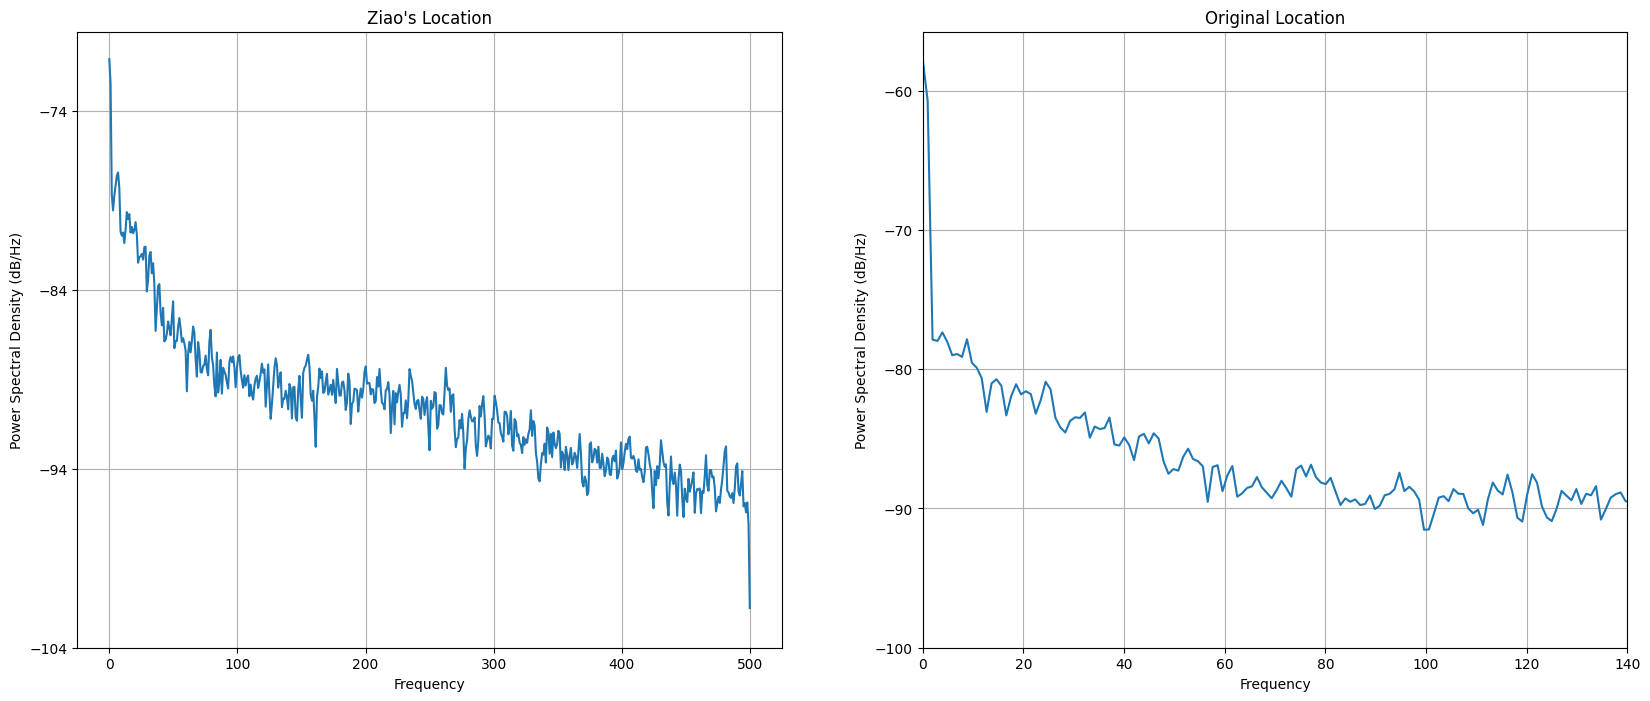

In [1]:
from fooof import FOOOF
from fooof.sim.gen import gen_aperiodic
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
%matplotlib inline
import os
curdir = os.path.basename(os.getcwd())
fig, axs = plt.subplots(nrows = 1,ncols= 2, figsize =(20,8))
if (curdir == 'Analysis'):
    %cd simulation_results
    %cd baseline_1   
f0 = h5py.File('ecp.h5','r')
data0 = f0['ecp']['data'][50000:][::10].reshape(-1,)
freq0, psd0 = axs[0].psd(data0, NFFT=1024, Fs=1000)
axs[0].set_title("Ziao's Location")
if (curdir !='M1Focus'):
    %cd ..
    %cd ..
    %cd ..
    %cd M1Focus
    %cd output
f1 = h5py.File('ecp.h5','r')
data1 = f1['ecp']['data'][50000:][::10].reshape(-1,)
freq1, psd1 = axs[1].psd(data1, NFFT=1024, Fs=1000)   
axs[1].set_title("Original Location")


fs = [f0, f1]
datas = [data0, data1]
freqs = [freq0, freq1]
psds = [psd0, psd1]
plt.xlim(0,140)
plt.show()

## We can use fooof to filter out the 1/f component. You can switch between the fooof output and the residual plot by commenting out the different plot functions.


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 0 - 500 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -7.1946, 0.8133                                          
                                                                                                  
                             

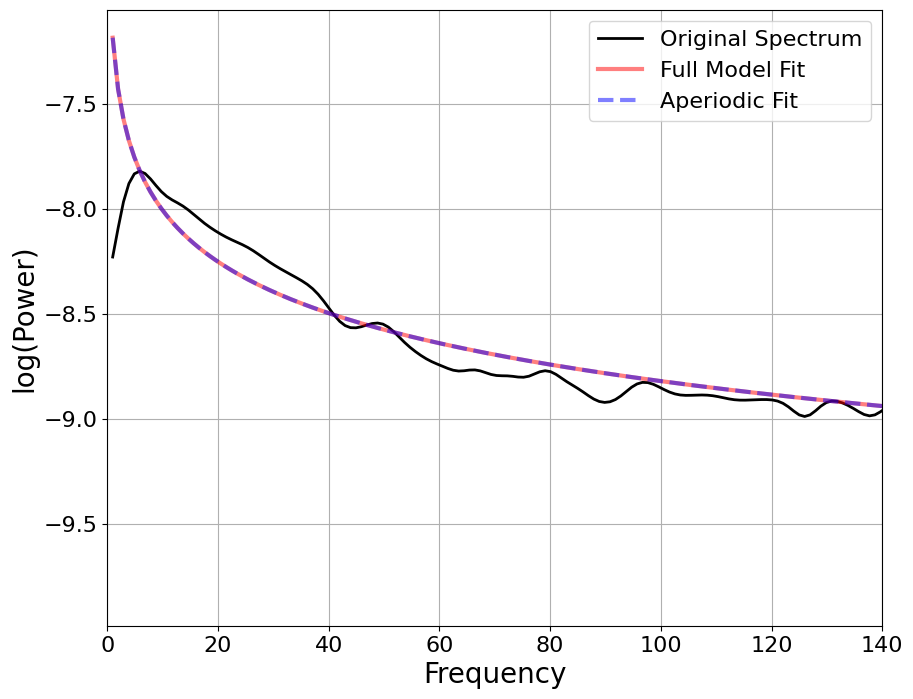

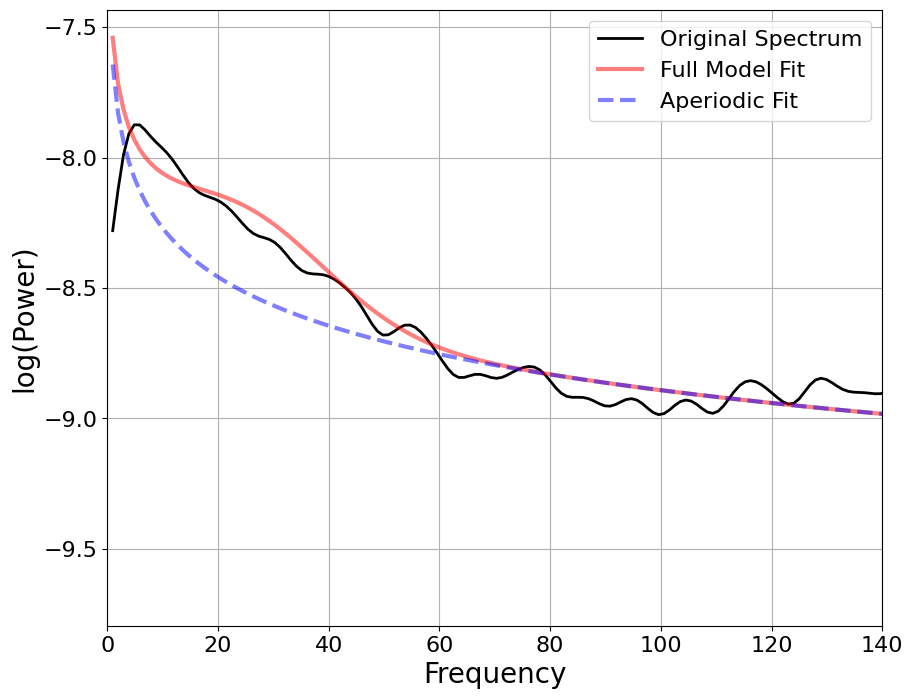

In [2]:
fs = []
spectrums = []
for i in range(2):
    f,spectrum = welch(datas[i],fs=1000,nfft=1024)
    fs.append(f)
    spectrums.append(spectrum)
freq_range=600.
peak_width_limits=100.
dB_threshold=3.
max_n_peaks=10
aperiodic_mode='fixed'
def set_range(x, upper=f[-1]):        
    x = np.array(upper) if x is None else np.array(x)
    return [f[2], x.item()] if x.size == 1 else x.tolist()
freq_range = set_range(freq_range)
peak_width_limits = set_range(peak_width_limits, np.inf)
fm = FOOOF(peak_width_limits=peak_width_limits, min_peak_height=dB_threshold / 10,
               peak_threshold=0., max_n_peaks=max_n_peaks, aperiodic_mode=aperiodic_mode)
for i in range(2):
    fm.fit(fs[i], spectrums[i])
    ap_fit = fm._ap_fit
    residual_spec = spectrum[1:] - 10**ap_fit # making arrays match and making ap_fit linear scale
    fm.print_results()
    fm.plot()
    plt.xlim([0,140])
    

# We can see the filter plot has a huge bump at around 60Hz which is a gamma bump

(0.0, 140.0)

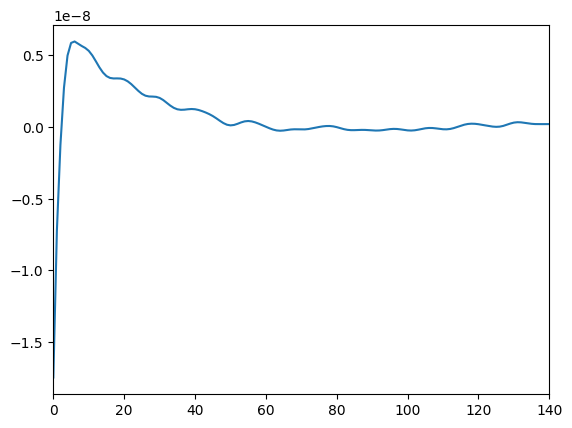

In [3]:
plt.plot(residual_spec)
plt.xlim([0,140])

# we can also see a bump this way also

/home/kac2cf/M1_1000/M1Focus


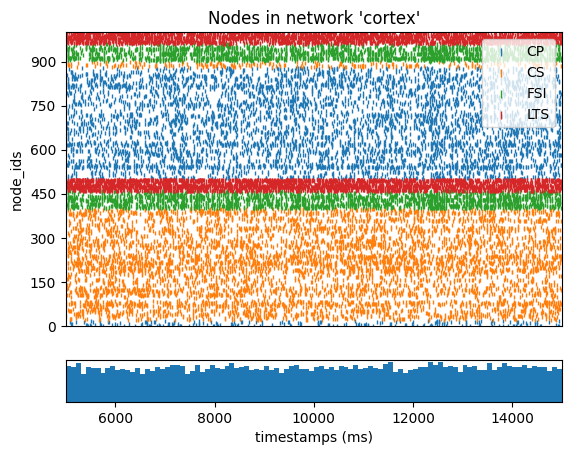

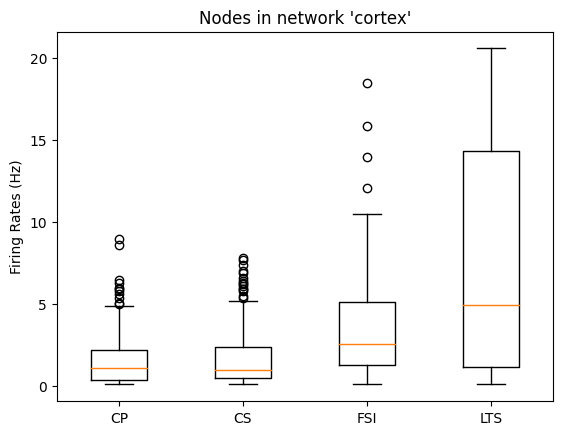

In [4]:
%matplotlib inline
%cd ..
from bmtk.analyzer.spike_trains import plot_raster,plot_rates_boxplot
import matplotlib.pyplot as plt

plot_raster(config_file='config.json',times=((5000,15000)),group_by='pop_name')
plot_rates_boxplot(config_file = 'config.json',group_by='pop_name',times=((5000,15000)))
plt.show()